In [1]:
#Импорт библиотек для работы с данными
import pickle
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split

In [2]:
#Загрузка данных из файла site.pkl
pkl = pd.read_pickle('site.pkl')

In [3]:
#Создание DataFrame по данным из файла site.pkl
df_sites = pd.DataFrame(pkl.keys(), index=pkl.values(), columns=['title'])
df_sites

,title
25075,www.abmecatronique.com
13997,groups.live.com
42436,majeureliguefootball.wordpress.com
30911,cdt46.media.tourinsoft.eu
8104,www.hdwallpapers.eu
...,...
29738,i1-js-14-3-01-11074-747051290-i.init.cedexis-r...
40794,i1-js-14-3-01-12434-548464295-i.init.cedexis-r...
10939,embed.api.tv
40028,n-tennis.fr


In [4]:
#Сортировка данных по индексу id_site
df_sites.index.name = 'id_site'
df_sites = df_sites.sort_index()
df_sites.head()

,title
id_site,
1,fpdownload2.macromedia.com
2,hotmail.fr
3,login.live.com
4,mail.live.com
5,dub122.mail.live.com


In [5]:
#Загрузка данных из train_ses.csv
df_train = pd.read_csv('train_ses.csv', sep=',', index_col='session_id', low_memory=False)
df_train.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [6]:
#Загрузка данных из test_ses.csv
df_test = pd.read_csv('test_ses.csv', sep=',', index_col='session_id', low_memory=False)
df_test.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


#Предобработка данных

In [7]:
#Проверка типов данных в df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   250098 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   246919 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   244321 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   241829 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   239495 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   237297 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   235224 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   233084 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  231052 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

In [8]:
#Проверка типов данных в df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   site1   82797 non-null  int64  
 1   time1   82797 non-null  object 
 2   site2   81308 non-null  float64
 3   time2   81308 non-null  object 
 4   site3   80075 non-null  float64
 5   time3   80075 non-null  object 
 6   site4   79182 non-null  float64
 7   time4   79182 non-null  object 
 8   site5   78341 non-null  float64
 9   time5   78341 non-null  object 
 10  site6   77566 non-null  float64
 11  time6   77566 non-null  object 
 12  site7   76840 non-null  float64
 13  time7   76840 non-null  object 
 14  site8   76151 non-null  float64
 15  time8   76151 non-null  object 
 16  site9   75484 non-null  float64
 17  time9   75484 non-null  object 
 18  site10  74806 non-null  float64
 19  time10  74806 non-null  object 
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


In [9]:
#Преобразование значений object в datetime
def replace_time_todatetime(dataFrame):
    for i in range(1, 11):
        column = f'time{i}'
        dataFrame[column] = pd.to_datetime(dataFrame[column])

In [10]:
#Преобразование столбцов в тип datetime
replace_time_todatetime(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   site1   253561 non-null  int64         
 1   time1   253561 non-null  datetime64[ns]
 2   site2   250098 non-null  float64       
 3   time2   250098 non-null  datetime64[ns]
 4   site3   246919 non-null  float64       
 5   time3   246919 non-null  datetime64[ns]
 6   site4   244321 non-null  float64       
 7   time4   244321 non-null  datetime64[ns]
 8   site5   241829 non-null  float64       
 9   time5   241829 non-null  datetime64[ns]
 10  site6   239495 non-null  float64       
 11  time6   239495 non-null  datetime64[ns]
 12  site7   237297 non-null  float64       
 13  time7   237297 non-null  datetime64[ns]
 14  site8   235224 non-null  float64       
 15  time8   235224 non-null  datetime64[ns]
 16  site9   233084 non-null  float64       
 17  time9   233084 non-null  date

In [11]:
#Преобразование столбцов в тип datetime
replace_time_todatetime(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   site1   82797 non-null  int64         
 1   time1   82797 non-null  datetime64[ns]
 2   site2   81308 non-null  float64       
 3   time2   81308 non-null  datetime64[ns]
 4   site3   80075 non-null  float64       
 5   time3   80075 non-null  datetime64[ns]
 6   site4   79182 non-null  float64       
 7   time4   79182 non-null  datetime64[ns]
 8   site5   78341 non-null  float64       
 9   time5   78341 non-null  datetime64[ns]
 10  site6   77566 non-null  float64       
 11  time6   77566 non-null  datetime64[ns]
 12  site7   76840 non-null  float64       
 13  time7   76840 non-null  datetime64[ns]
 14  site8   76151 non-null  float64       
 15  time8   76151 non-null  datetime64[ns]
 16  site9   75484 non-null  float64       
 17  time9   75484 non-null  datetime64[ns]
 18  site10

In [12]:
#Проверка на пустые значения df_train
df_train.isnull().sum()

site1         0
time1         0
site2      3463
time2      3463
site3      6642
time3      6642
site4      9240
time4      9240
site5     11732
time5     11732
site6     14066
time6     14066
site7     16264
time7     16264
site8     18337
time8     18337
site9     20477
time9     20477
site10    22509
time10    22509
target        0
dtype: int64

In [13]:
#Проверка на пустые значения df_test
df_test.isnull().sum()

site1        0
time1        0
site2     1489
time2     1489
site3     2722
time3     2722
site4     3615
time4     3615
site5     4456
time5     4456
site6     5231
time6     5231
site7     5957
time7     5957
site8     6646
time8     6646
site9     7313
time9     7313
site10    7991
time10    7991
dtype: int64

Замена пустых значений

In [14]:
#Категориальные данные заменяются на моду

In [15]:
#Функция замены пустых значений на моду
def replace_value_site(dataFrame):
    for i in range(2, 11):
        column_name = f'site{i}'
        dataFrame[column_name].fillna(dataFrame[column_name].mode()[0], inplace=True)

In [16]:
#Замена NaN в df_train
replace_value_site(df_train)
df_train.isnull().sum()

site1         0
time1         0
site2         0
time2      3463
site3         0
time3      6642
site4         0
time4      9240
site5         0
time5     11732
site6         0
time6     14066
site7         0
time7     16264
site8         0
time8     18337
site9         0
time9     20477
site10        0
time10    22509
target        0
dtype: int64

In [17]:
#Функция для замены NaN в df_test
replace_value_site(df_test)
df_test.isnull().sum()

site1        0
time1        0
site2        0
time2     1489
site3        0
time3     2722
site4        0
time4     3615
site5        0
time5     4456
site6        0
time6     5231
site7        0
time7     5957
site8        0
time8     6646
site9        0
time9     7313
site10       0
time10    7991
dtype: int64

In [18]:
#Функция преобразования значений float64 в int64
def replace_float_int(dataFrame):
    for i in range(1, 11):
        column = f'site{i}'
        dataFrame[column] = dataFrame[column].astype('int64')

In [19]:
#Преобразование столбцов site_i в df_train к типу int64
replace_float_int(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   site1   253561 non-null  int64         
 1   time1   253561 non-null  datetime64[ns]
 2   site2   253561 non-null  int64         
 3   time2   250098 non-null  datetime64[ns]
 4   site3   253561 non-null  int64         
 5   time3   246919 non-null  datetime64[ns]
 6   site4   253561 non-null  int64         
 7   time4   244321 non-null  datetime64[ns]
 8   site5   253561 non-null  int64         
 9   time5   241829 non-null  datetime64[ns]
 10  site6   253561 non-null  int64         
 11  time6   239495 non-null  datetime64[ns]
 12  site7   253561 non-null  int64         
 13  time7   237297 non-null  datetime64[ns]
 14  site8   253561 non-null  int64         
 15  time8   235224 non-null  datetime64[ns]
 16  site9   253561 non-null  int64         
 17  time9   233084 non-null  date

In [20]:
#Преобразование столбцов site_i в df_test к типу int64
replace_float_int(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   site1   82797 non-null  int64         
 1   time1   82797 non-null  datetime64[ns]
 2   site2   82797 non-null  int64         
 3   time2   81308 non-null  datetime64[ns]
 4   site3   82797 non-null  int64         
 5   time3   80075 non-null  datetime64[ns]
 6   site4   82797 non-null  int64         
 7   time4   79182 non-null  datetime64[ns]
 8   site5   82797 non-null  int64         
 9   time5   78341 non-null  datetime64[ns]
 10  site6   82797 non-null  int64         
 11  time6   77566 non-null  datetime64[ns]
 12  site7   82797 non-null  int64         
 13  time7   76840 non-null  datetime64[ns]
 14  site8   82797 non-null  int64         
 15  time8   76151 non-null  datetime64[ns]
 16  site9   82797 non-null  int64         
 17  time9   75484 non-null  datetime64[ns]
 18  site10

В силу большого количества данных, для дальнейшей работы имеет вынести часть данных в отдельные выборки

In [21]:
#Создание выборок для df_train, df_test
df_train_low, data = train_test_split(df_train, test_size=0.98)
df_test_low, data = train_test_split(df_test, test_size=0.95)

Создание мешка сайтов для df_train

In [22]:
#Создание матрицы для встречающихся значений сайтов для первых 1000 строк в df_train_low
df_train_matrix = None
lenght = 1000
for i in range(0, 1, lenght):
    for j in range(1, 11):
        column = f'site{j}'
        support_df = pd.get_dummies(df_train_low[column][i:i+lenght])
    
        if (df_train_matrix is None):
            df_train_matrix = support_df
        else:
            df_train_matrix.add(support_df, fill_value=0)
df_train_matrix.head()

,1,3,11,12,14,18,20,21,22,23,...,36110,37306,38503,39128,39653,40120,40121,40122,40939,41476
session_id,,,,,,,,,,,,,,,,,,,,,
227101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139831,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Сохранение матрицы
df_train_matrix.to_csv('df_train_matrix.csv', sep=';')

Создание мешка сайтов для df_test

In [24]:
#Создание матрицы для встречающихся значений сайтов для первых 1000 строк в df_train_low
df_test_matrix = None
lenght = 1000
for i in range(0, 1, lenght):
    for j in range(1, 11):
        column = f'site{j}'
        support_df = pd.get_dummies(df_test_low[column][i:i+lenght])
    
        if (df_test_matrix is None):
            df_test_matrix = support_df
        else:
            df_test_matrix.add(support_df, fill_value=0)
df_test_matrix.head()

,1,2,3,4,6,8,11,12,14,16,...,46191,46336,46400,47153,47272,47348,47648,48151,48204,48353
session_id,,,,,,,,,,,,,,,,,,,,,
8538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Сохранение матрицы
df_test_matrix.to_csv('df_test_matrix.csv', sep=';')

Проверка предположения, что все сайты были посещены почти в одно и то же время

In [26]:
df_traint_copy = df_train.copy()
df_traint_copy = df_traint_copy.dropna()

# Преобразование datetime в unix
for key in range(1, 11):
    key = "time"+str(key)
    dates = pd.to_datetime(df_traint_copy[key])
    df_traint_copy[key] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

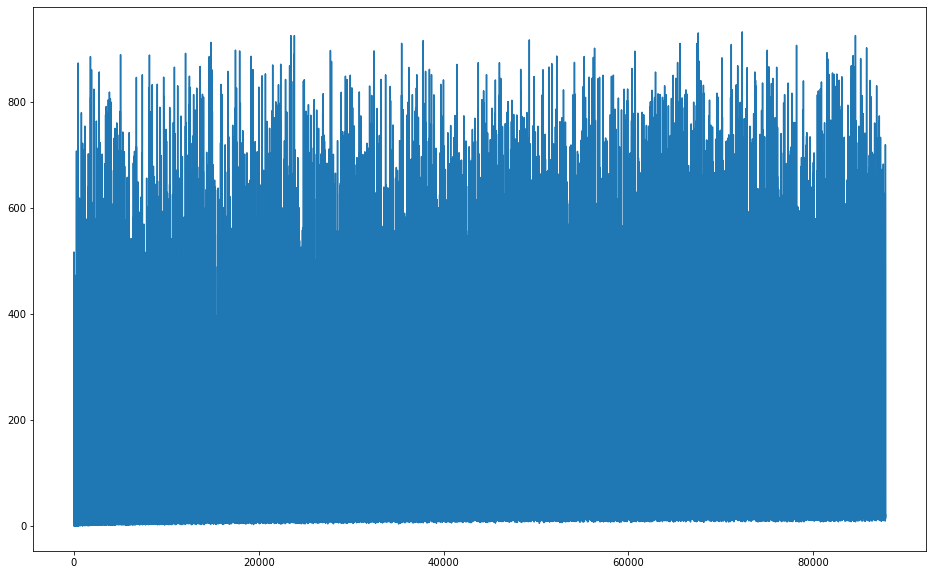

In [27]:
times_df_train = df_traint_copy[(f'time{x}' for x in range(1,11))]
plt.figure(figsize=(16, 10))
plt.plot(times_df_train.T.std().unique())

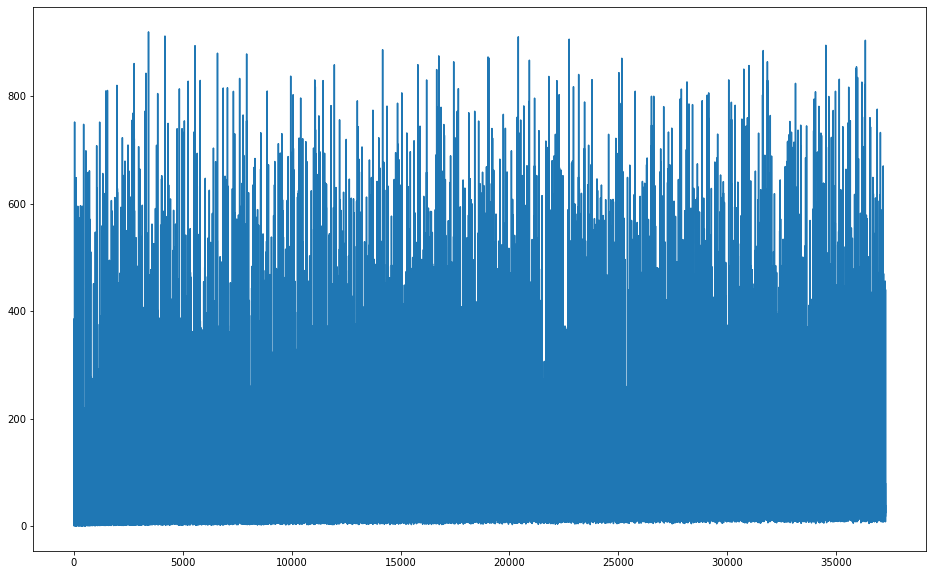

In [28]:
df_test_copy = df_test.copy()
df_test_copy = df_test_copy.dropna()

# Преобразование datetime в unix
for key in range(1, 11):
    key = "time"+str(key)
    dates = pd.to_datetime(df_test_copy[key])
    df_test_copy[key] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

times_df_train = df_test_copy[(f'time{x}' for x in range(1,11))]
plt.figure(figsize=(16, 10))
plt.plot(times_df_train.T.std().unique())

Удаление столбцов time_i

По графикам видно, что в среднем время необходимое чтобы пользователь посетил все 10 сайтов находится в пределах 20 минут, т.к. график построен по стандартному отклонению сессии, и можно сделать вывод что будет достаточно только начального значения сессии, и для дальнейших вычислений ограничиться часом, когда была начата сессия, не углубляясь в минуты, секунды.

In [29]:
#Для df_train
df_train = df_train.drop(columns=['time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10'])
df_train.head()

,site1,time1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
session_id,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,21,21,21,21,21,21,21,21,21,0
2,890,2014-02-22 11:19:50,941,3847,941,942,3846,3847,3846,1516,1518,0
3,14769,2013-12-16 16:40:17,39,14768,14769,37,39,14768,14768,14768,14768,0
4,782,2014-03-28 10:52:12,782,782,782,782,782,782,782,782,782,0
5,22,2014-02-28 10:53:05,177,175,178,177,178,175,177,177,178,0


In [30]:
df_test = df_test.drop(columns=['time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10'])
df_test.head()

,site1,time1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35,22,321,23,2211,6730,21,44582,15336
2,782,2014-07-03 11:00:28,782,782,782,782,782,782,782,782,782
3,55,2014-12-05 15:55:12,55,55,55,55,55,55,55,1445,1445
4,1023,2014-11-04 10:03:19,1022,50,222,202,3374,50,48,48,3374
5,301,2014-05-16 15:05:31,301,301,66,67,69,70,68,71,167


Визуализация влияния атрибутов на целевую функцию

<AxesSubplot:>

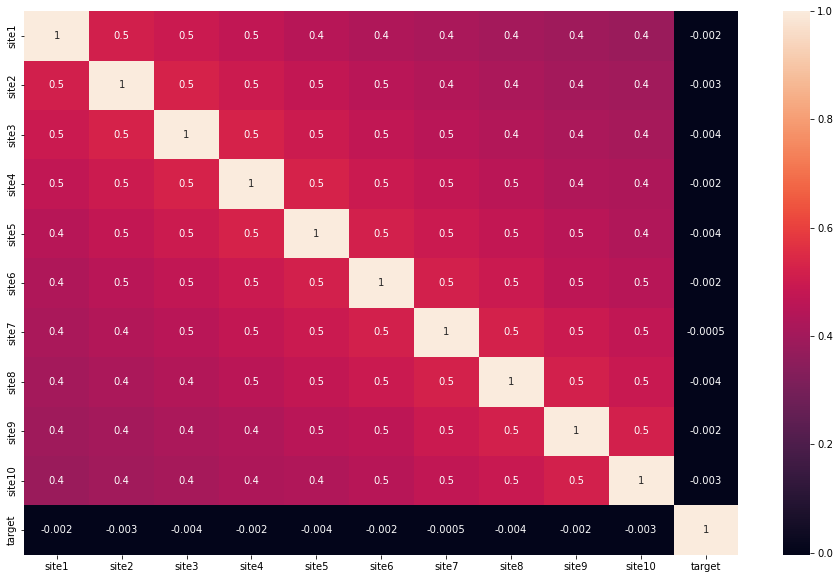

In [31]:
#Диаграмма коэффициентов корреляций
plt.figure(figsize=(16, 10))
sbn.heatmap(df_train.corr(), annot = True, fmt='.1g')

<Figure size 1152x720 with 0 Axes>

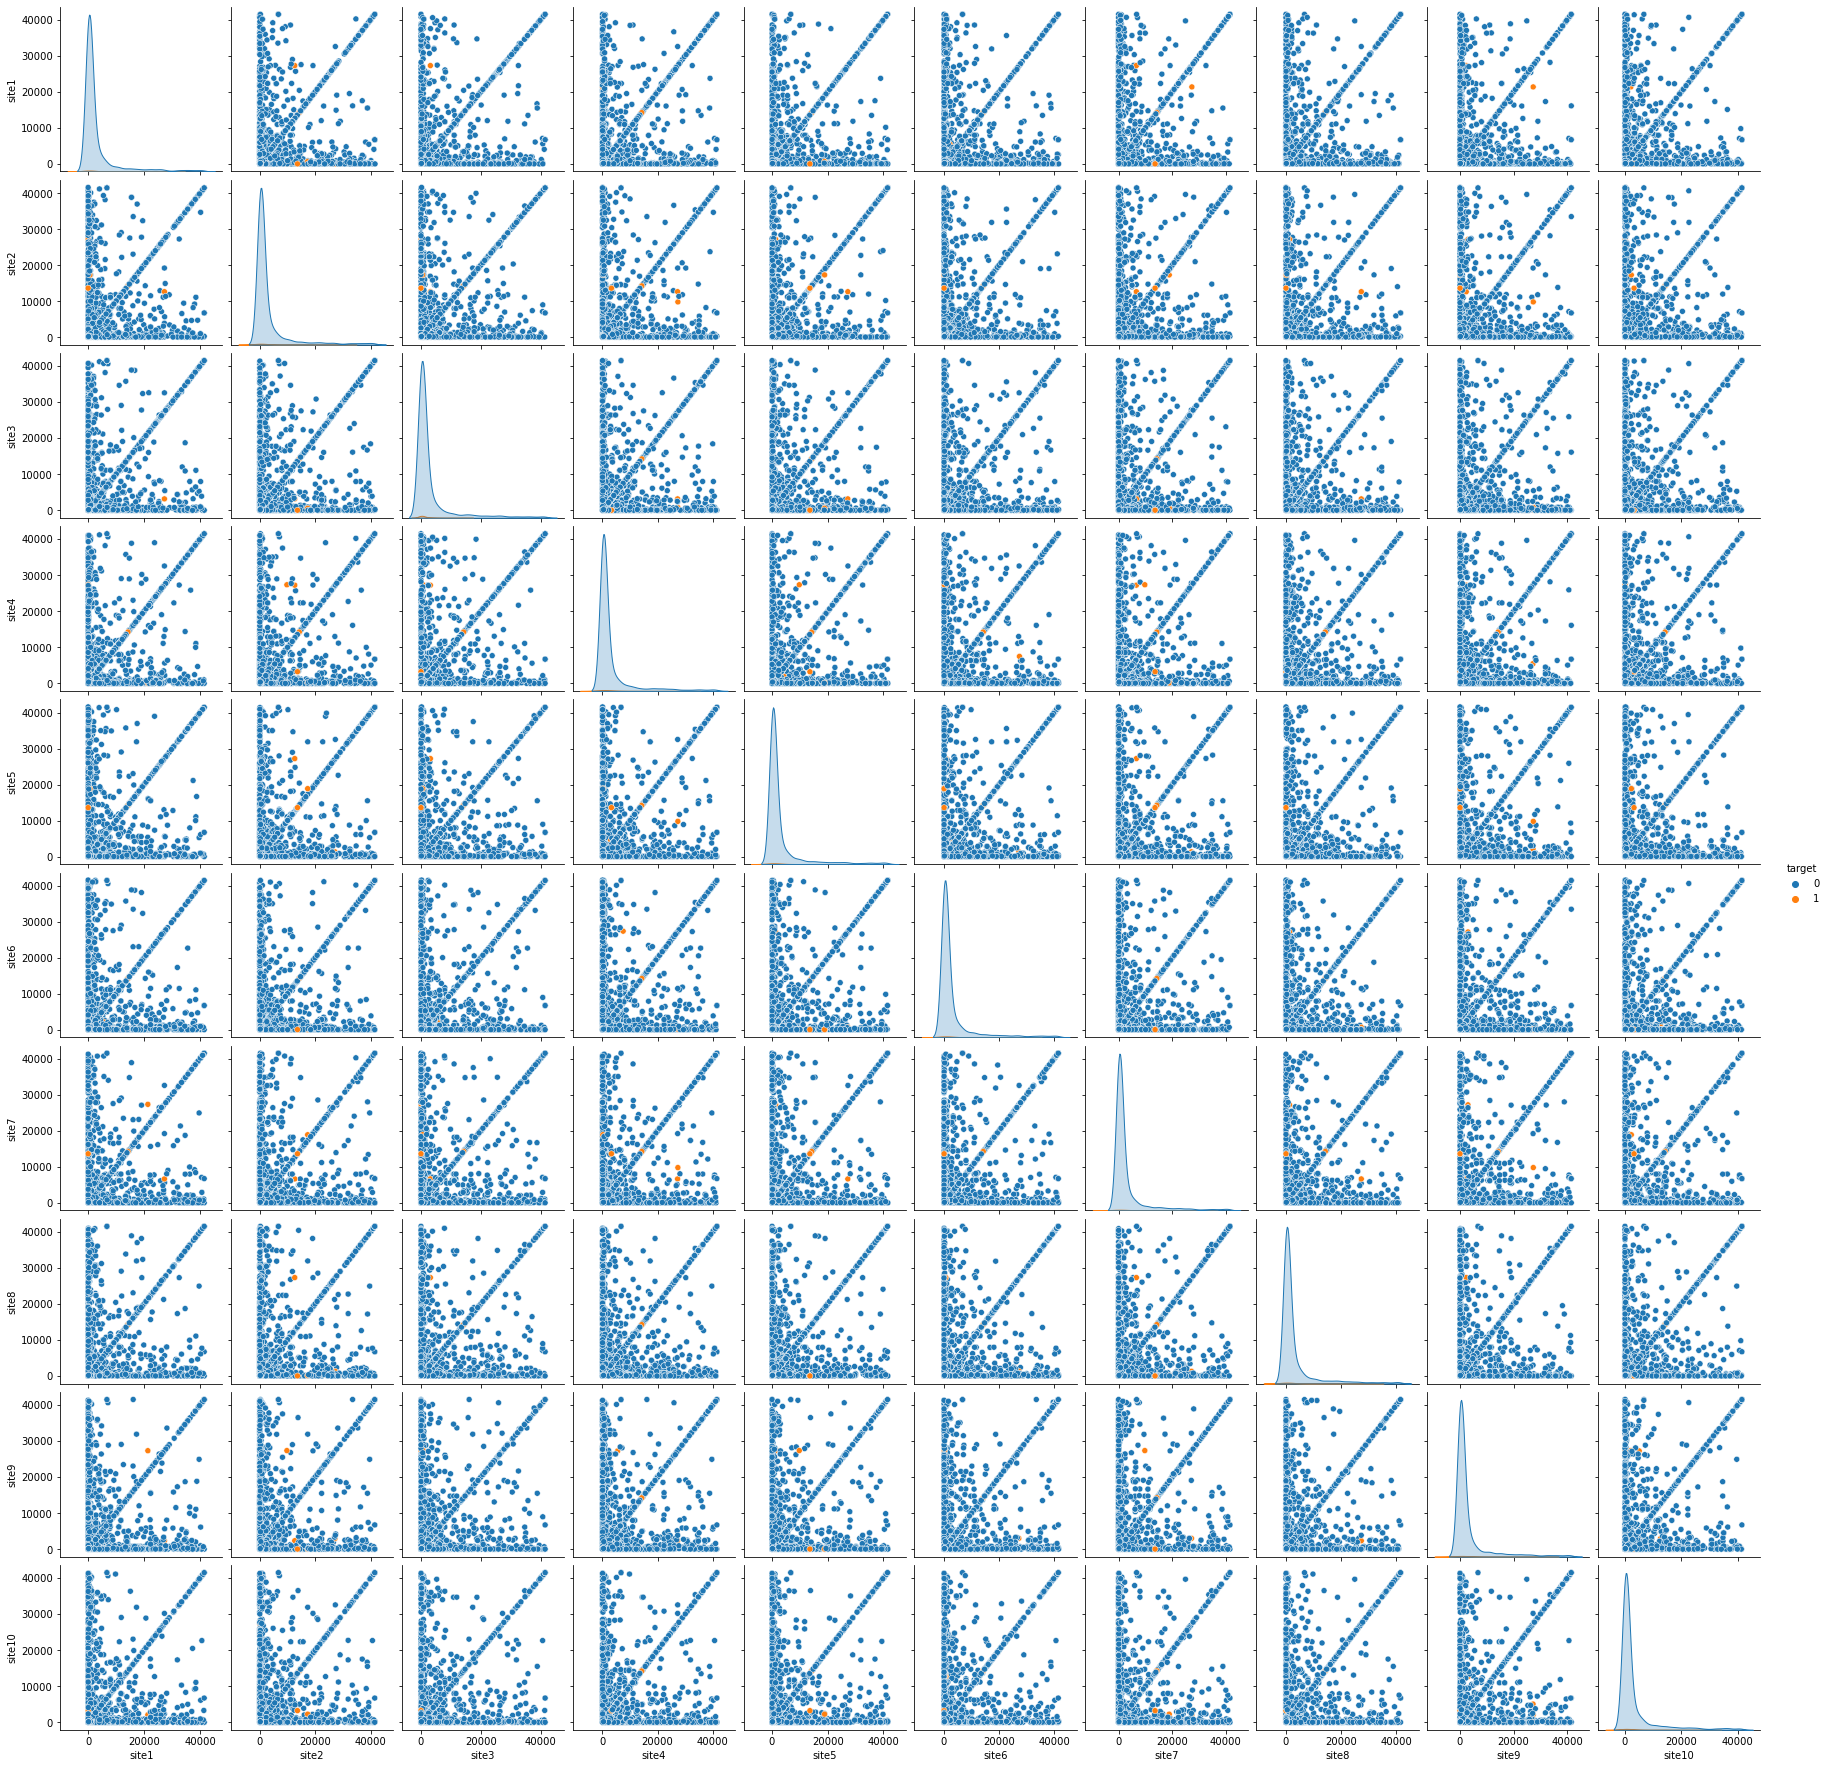

In [32]:
#Создание визуального отображения отношения между всеми парами переменных, по облегченной выборке, в силу большого количества данных для отображения и связанных с этим ресурсов
plt.figure(figsize=(16, 10))
sbn.pairplot(df_train_low, hue="target")

Столбцы site_i являются категориальными признаками, для них не получается отследить прямую зависимость целевой переменной (target), необходимо создать дополнительные параметры и визуализировать их значения

Создание дополнительных параметров

Т.к. для модели машинного обучения зачастую не обрабатывают данные типа datetime, их необходимо разбить на дополнительные столбцы, каждый из которых хранил бы в себе целочисленное значение

In [33]:
#Функция создания дополнительного параметра вида ГГГГММ с целочисленным значением, который необходим для учитывания помесячного линейного тренда за весь период предоставленных данных
def split_datetime_yearmonth(dataframe, column):
    year = 'Year/Month'
    dataframe[year] = [f'{item.year}{item.month:02}' for item in dataframe[column]]
    dataframe[year] = dataframe[year].astype('int64')
    dataframe = dataframe.drop(columns=column)

In [34]:
#Использование данной функции для создания дополнительного параметра по типу ГГГГММ
split_datetime_yearmonth(df_train, 'time1')
df_train.head()

,site1,time1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,Year/Month
session_id,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,21,21,21,21,21,21,21,21,21,0,201402
2,890,2014-02-22 11:19:50,941,3847,941,942,3846,3847,3846,1516,1518,0,201402
3,14769,2013-12-16 16:40:17,39,14768,14769,37,39,14768,14768,14768,14768,0,201312
4,782,2014-03-28 10:52:12,782,782,782,782,782,782,782,782,782,0,201403
5,22,2014-02-28 10:53:05,177,175,178,177,178,175,177,177,178,0,201402


In [35]:
#Функция вынесения значений (День, час, минуты, секунды) из datetime в дополнительный параметр
def split_datetime_int(dataframe, target_column, new_column):
    column = new_column
    if column == 'day':
        dataframe[column] = [item.day for item in dataframe[target_column]]
    if column == 'hour':
        dataframe[column] = [item.hour for item in dataframe[target_column]]
    dataframe = dataframe.drop(columns=target_column)

Использование данной функции для вынесения дня месяца в дополнительный параметр

In [36]:
split_datetime_int(df_train, 'time1', 'day')
df_train.head()

,site1,time1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,Year/Month,day
session_id,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,21,21,21,21,21,21,21,21,21,0,201402,20
2,890,2014-02-22 11:19:50,941,3847,941,942,3846,3847,3846,1516,1518,0,201402,22
3,14769,2013-12-16 16:40:17,39,14768,14769,37,39,14768,14768,14768,14768,0,201312,16
4,782,2014-03-28 10:52:12,782,782,782,782,782,782,782,782,782,0,201403,28
5,22,2014-02-28 10:53:05,177,175,178,177,178,175,177,177,178,0,201402,28


In [37]:
#Использование данной функции для вынесения часа в дополнительный параметр
split_datetime_int(df_train, 'time1', 'hour')
df_train.head()

,site1,time1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,Year/Month,day,hour
session_id,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,21,21,21,21,21,21,21,21,21,0,201402,20,10
2,890,2014-02-22 11:19:50,941,3847,941,942,3846,3847,3846,1516,1518,0,201402,22,11
3,14769,2013-12-16 16:40:17,39,14768,14769,37,39,14768,14768,14768,14768,0,201312,16,16
4,782,2014-03-28 10:52:12,782,782,782,782,782,782,782,782,782,0,201403,28,10
5,22,2014-02-28 10:53:05,177,175,178,177,178,175,177,177,178,0,201402,28,10


In [38]:
#Т.к. вся информация из time1 вынесена в дополнительные параметры, данный столбец можно удалить
df_train = df_train.drop(columns=['time1'])
df_train.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,Year/Month,day,hour
session_id,,,,,,,,,,,,,,
1,718,21,21,21,21,21,21,21,21,21,0,201402,20,10
2,890,941,3847,941,942,3846,3847,3846,1516,1518,0,201402,22,11
3,14769,39,14768,14769,37,39,14768,14768,14768,14768,0,201312,16,16
4,782,782,782,782,782,782,782,782,782,782,0,201403,28,10
5,22,177,175,178,177,178,175,177,177,178,0,201402,28,10


Визуализация данных

На какой сайт был совершен переход однозначно является важным параметром. Необходимо проверить на зависимость дополнительные параметры, созданные ранее

<AxesSubplot:xlabel='Year/Month', ylabel='count'>

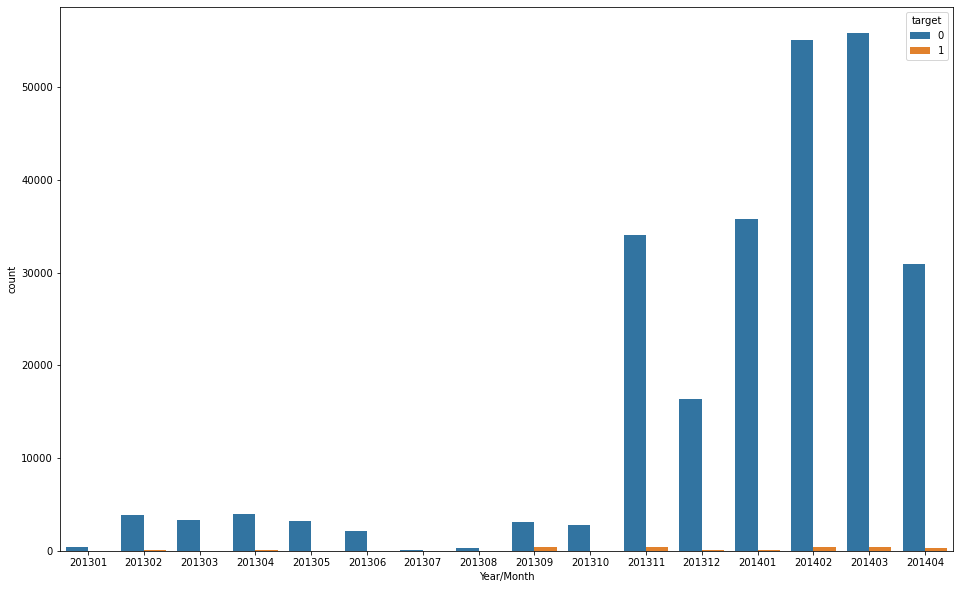

In [39]:
#Проверка зависимости целевого параметра от Year/Month
plt.figure(figsize=(16, 10))
sbn.countplot(x='Year/Month', hue='target', data=df_train)

По графику видно, что количество выявленных сессий преступников больше в конце 2013 и начале 2014

<AxesSubplot:xlabel='day', ylabel='count'>

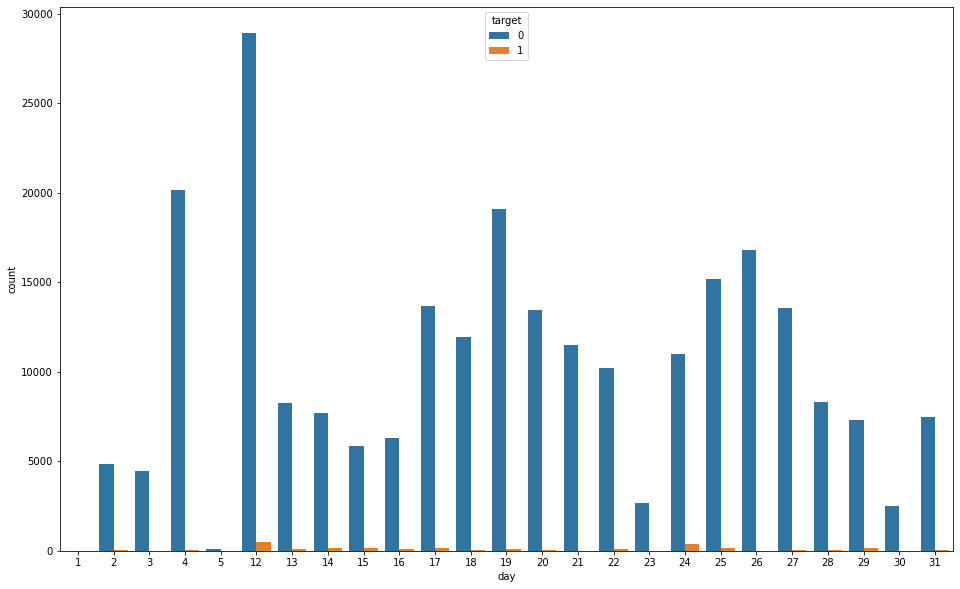

In [40]:
#Проверка зависимости целевого параметра от day
plt.figure(figsize=(16, 10))
sbn.countplot(x='day', hue='target', data=df_train)

По графику видно, что преступники более активны в период от 12 до 24 числа месяца

<AxesSubplot:xlabel='hour', ylabel='count'>

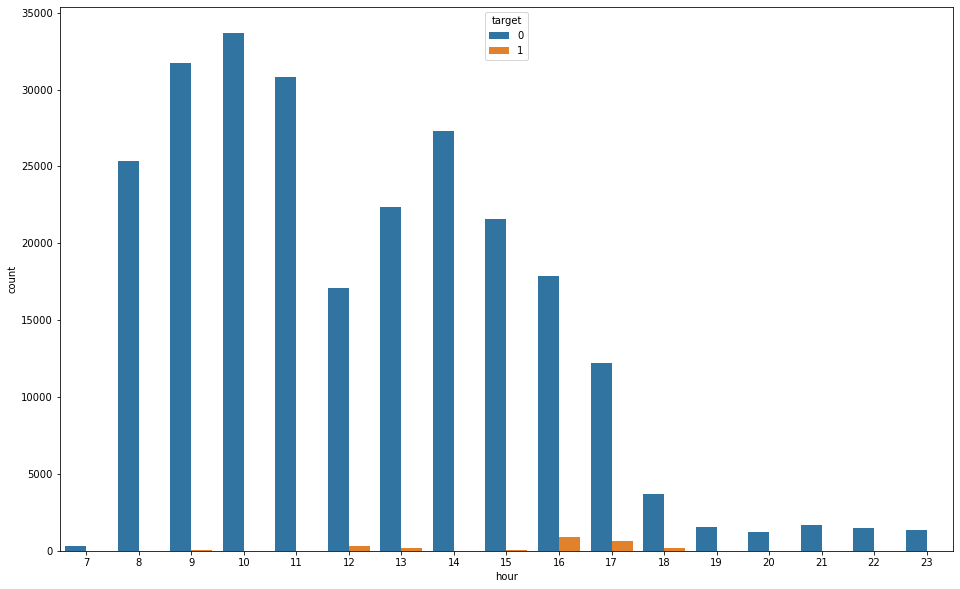

In [41]:
#Проверка зависимости целевого параметра от hour
plt.figure(figsize=(16, 10))
sbn.countplot(x='hour', hue='target', data=df_train)

По графику видно, что преступники более активны с 12-00 до 18-00

Выявлена явная зависимость дополнительных параметров Year/Month, day, hour с целевой переменной target.

В df_test необходимо также выделить данные параметры.

In [42]:
#Вынесение данных Year/Month, day, hour из столбца time1, при помощи созданных ранее функций с последующим удалением столбца time1
split_datetime_yearmonth(df_test, 'time1')
split_datetime_int(df_test, 'time1', 'day')
split_datetime_int(df_test, 'time1', 'hour')
df_test = df_test.drop(columns=['time1'])
df_test.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,Year/Month,day,hour
session_id,,,,,,,,,,,,,
1,29,35,22,321,23,2211,6730,21,44582,15336,201410,4,11
2,782,782,782,782,782,782,782,782,782,782,201407,3,11
3,55,55,55,55,55,55,55,55,1445,1445,201412,5,15
4,1023,1022,50,222,202,3374,50,48,48,3374,201411,4,10
5,301,301,301,66,67,69,70,68,71,167,201405,16,15


Сохранение предобработанных данных во внешние файлы

In [43]:
#Сохранение df_train в файл df_train.csv
df_train.to_csv('df_train.csv', sep=';')

In [44]:
#Сохранение df_test в файл df_test.csv
df_test.to_csv('df_test.csv', sep=';')

Модуль 2

In [45]:
#Импорт библиотек
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#Выделение целевого параметра
y = df_train['target']
x = df_train.drop(columns=['target'])

In [47]:
#Разбиение данных на тестовую и отложенную выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [48]:
#Создание объектов моделей
model_DecTree = DecisionTreeClassifier()
model_RanFore = RandomForestClassifier()
model_ExtTree = ExtraTreesClassifier()
model_KNeighb = KNeighborsClassifier()

In [49]:
#Обучение моделей
model_DecTree.fit(x_train, y_train)
model_RanFore.fit(x_train, y_train)
model_ExtTree.fit(x_train, y_train)
model_KNeighb.fit(x_train, y_train)

KNeighborsClassifier()

<AxesSubplot:>

<Figure size 1152x720 with 0 Axes>

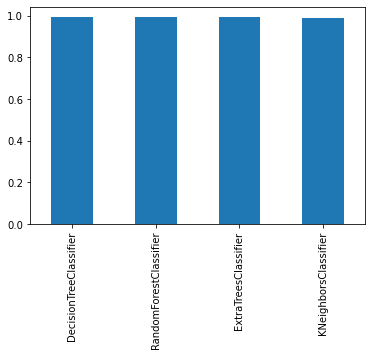

In [50]:
#Оценка результатов обученных моделей
results = {}

results['DecisionTreeClassifier'] = model_DecTree.score(x_test, y_test)
results['RandomForestClassifier'] = model_RanFore.score(x_test, y_test)
results['ExtraTreesClassifier'] = model_ExtTree.score(x_test, y_test)
results['KNeighborsClassifier'] = model_KNeighb.score(x_test, y_test)

plt.figure(figsize=(16, 10))
pd.DataFrame.from_dict(data=results, orient='index').plot(kind='bar', legend=None)

In [51]:
#Визуально сложно поределить какая из моделей более точно предсказывает сессию преступника
pd.DataFrame([results]).max()

DecisionTreeClassifier    0.992211
RandomForestClassifier    0.993493
ExtraTreesClassifier      0.993769
KNeighborsClassifier      0.990929
dtype: float64

Лучше всего для текущих данных подходит модель ExtraTreesClassifier, с точностью - 99.4380 %

Импорт дополнительных модулей для построения кривых валидации и обучения

In [52]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [53]:
#Расчет кривой валидации
param_range = [10, 20, 30, 40, 50, 60]
train_scores, test_scores = validation_curve(ExtraTreesClassifier(),x_test,  y_test,param_name="n_estimators",param_range=param_range,scoring="accuracy",n_jobs=-1)
train_scores_mean_val = np.mean(train_scores, axis=1)
train_scores_std_val = np.std(train_scores, axis=1)
test_scores_mean_val = np.mean(test_scores, axis=1)
test_scores_std_val = np.std(test_scores, axis=1)

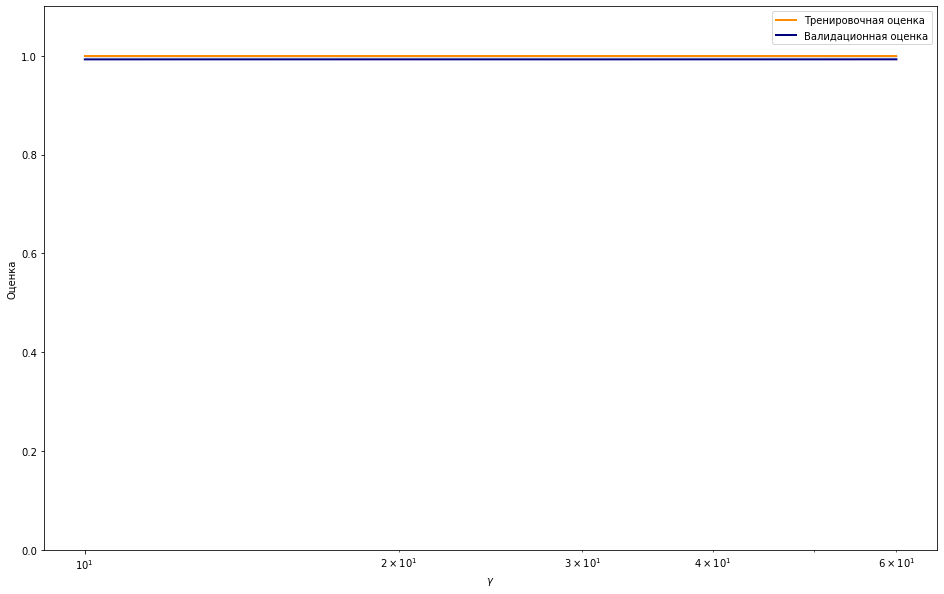

In [54]:
#Визуализация кривой валидации
plt.figure(figsize=(16, 10))
plt.xlabel(r"$\gamma$")
plt.ylabel("Оценка")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, 
    train_scores_mean_val, 
    label="Тренировочная оценка",
    color="darkorange",
    lw=lw
)
plt.fill_between(
    param_range, 
    train_scores_mean_val - train_scores_std_val,
    train_scores_mean_val + train_scores_std_val, 
    alpha=0.2,
    color="darkorange", 
    lw=lw
)
plt.semilogx(
    param_range, 
    test_scores_mean_val, 
    label="Валидационная оценка",
    color="navy", 
    lw=lw
)
plt.fill_between(
    param_range, 
    train_scores_mean_val - test_scores_std_val,
    train_scores_mean_val + test_scores_std_val, 
    alpha=0.2,
    color="navy", 
    lw=lw
)
plt.legend(loc="best")
plt.show()

Кривая валидации построена от 0.99 до 1, это показывает на то, что тренировочная и валидационная оценка находятся где-то рядом, и они минимальны. Это значит что модель не пере- или недо- обучена

In [55]:
#Расчет кривой обучения
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    ExtraTreesClassifier(),
    x_test, 
    y_test,
    n_jobs=-1,
    return_times=True,
    train_sizes=np.linspace(0.01, 1, 20)
)
train_scores_mean_lea = np.mean(train_scores, axis=1)
train_scores_std_lea = np.std(train_scores, axis=1)
test_scores_mean_lea = np.mean(test_scores, axis=1)
test_scores_std_lea = np.std(test_scores, axis=1)

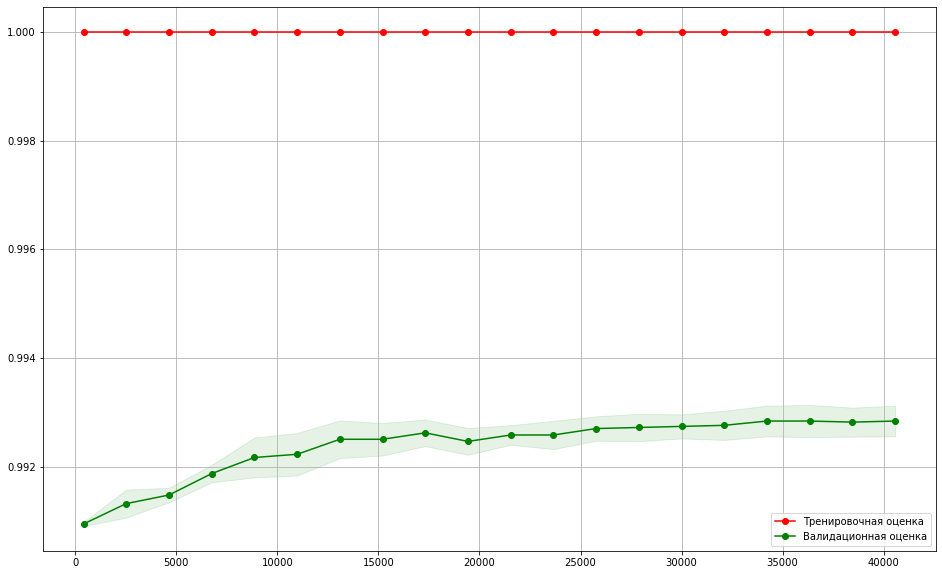

In [56]:
#Визуализация кривой обучения
plt.figure(figsize=(16, 10))
plt.grid()
plt.fill_between(
    train_sizes,
    train_scores_mean_lea - train_scores_std_lea,
    train_scores_mean_lea + train_scores_std_lea,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean_lea - test_scores_std_lea,
    test_scores_mean_lea + test_scores_std_lea,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, 
    train_scores_mean_lea, 
    "o-", 
    color="r", 
    label="Тренировочная оценка"
)
plt.plot(
    train_sizes, 
    test_scores_mean_lea, 
    "o-", 
    color="g", 
    label="Валидационная оценка"
)
plt.legend(loc="best")

Кривая обучения построена на 40000 данных, значения тренировочной оценки и валидационной оценки находятся в диапозоне от 0.99 до 1, это показывает на то, что эти все прямые "сошлись", следовательно такого количества данных достаточно для обучения точной модели, она не будет пере- или недо- обучена

In [57]:
#Переобучение модели на всей обучающей выборке
model_ExtTree.fit(x, y)

ExtraTreesClassifier()

In [58]:
#Предсказание вероятностей для тестовой выборки
predict_data = model_ExtTree.predict(df_test)

In [59]:
#Создание нового dataframe для отображения предсказаний
predict_data_dict = {
    'target' : predict_data,
    'session_id' : df_test.index.tolist()
}
df_predict = pd.DataFrame(predict_data_dict).set_index('session_id')

In [60]:
#Сохранение df_predict в файл df_predict.csv
df_predict.to_csv('df_predict.csv', sep=';')